### Darwin - mistura as características (blending theory) herdada dos pais

#### abrindo as bibliotecas com 'import'

In [1]:
# biblioteca matemática - numérica
import numpy as np
from scipy.stats import norm

# matplotlib biblioteca gráfica
import matplotlib.pyplot as plt

### Darwin não conhecia os Fatores (genes) nem Alelos de Mendel

#### Vamos supor que Darwin estivesse pensando em teorias eugenistas

  - branco -> p=0.0
  - negro -> p=1.0

logo,

  - pele clara p = [0.1, 0.3]
  - pele escura p = [0.7, 0.9]

#### Exemplo:

  - pai com pele escura: p_pai = 0.9
  - mãe com pele clara:  p_mae = 0.2

#### Para Darwin, o filho é uma mescla (média ~ blending) de ambos:

   - p_filho = (p_pai + p_mae)/2 = (0.9 + 0.2)/2 = 0.55 (pele morena)

### Ora o filho é menino, ora menina - como fazer isto matematicamente?

In [2]:
# Dê <CTRL><Enter> várias vezes
# 0 se pai
# 1 se mãe
np.random.randint(2)

1

### Misturando 10 gerações

  - a cada geração há uma mistura de fenótipos segundo Darwin
  - o filho torna-se pai ou mãe na próxima geração

In [3]:
n_gera = 10

p_pai0=0.9
p_mae0=0.1

p_pai=p_pai0
p_mae=p_mae0

historia=[]
genero = -1

# range: gerador de números
# for é um laço ou loop
for geracao in range(n_gera):
    p_filho = (p_pai + p_mae) / 2

    if genero == -1:
        s_genero = 'ini'
    elif genero == 0:
        s_genero = 'masc'
    else:
        s_genero = 'fem'

    print(f"geração {geracao}, genero {s_genero:4} p_filho={100*p_filho:.1f}%, p_pai={100*p_pai:.1f}%, p_mae={100*p_mae:.1f}%")

    historia.append(p_filho)

    genero = np.random.randint(2)
    if genero == 0:
        p_pai = p_filho
        p_mae=p_mae0
    else:
        p_mae = p_filho
        p_pai=p_pai0

print("------------- end -------------")

geração 0, genero ini  p_filho=50.0%, p_pai=90.0%, p_mae=10.0%
geração 1, genero fem  p_filho=70.0%, p_pai=90.0%, p_mae=50.0%
geração 2, genero fem  p_filho=80.0%, p_pai=90.0%, p_mae=70.0%
geração 3, genero fem  p_filho=85.0%, p_pai=90.0%, p_mae=80.0%
geração 4, genero fem  p_filho=87.5%, p_pai=90.0%, p_mae=85.0%
geração 5, genero fem  p_filho=88.8%, p_pai=90.0%, p_mae=87.5%
geração 6, genero fem  p_filho=89.4%, p_pai=90.0%, p_mae=88.8%
geração 7, genero masc p_filho=49.7%, p_pai=89.4%, p_mae=10.0%
geração 8, genero masc p_filho=29.8%, p_pai=49.7%, p_mae=10.0%
geração 9, genero fem  p_filho=59.9%, p_pai=90.0%, p_mae=29.8%
------------- end -------------


#### Criando um método em Python

In [4]:
def blending(n_gera:int=10, p_pai0:float=0.9, p_mae0:float=0.1, verbose:bool=False) -> list:

    p_pai=p_pai0
    p_mae=p_mae0

    historia=[]
    genero = -1

    # range: gerador de números
    for geracao in range(n_gera):
        p_filho = (p_pai + p_mae) / 2

        if genero == -1:
            s_genero = 'ini'
        elif genero == 0:
            s_genero = 'masc'
        else:
            s_genero = 'fem'

        if verbose: print(f"geração {geracao}, genero {s_genero:4} p_filho={100*p_filho:.1f}%, p_pai={100*p_pai:.1f}%, p_mae={100*p_mae:.1f}%")

        historia.append(p_filho)

        genero = np.random.randint(2)
        if genero == 0:
            p_pai = p_filho
            p_mae=p_mae0
        else:
            p_mae = p_filho
            p_pai=p_pai0

    print("------------- end -------------")

    return historia

In [5]:
N=10

historia = blending(n_gera=N)
len(historia)

------------- end -------------


10

In [6]:
historia

[0.5,
 0.3,
 0.2,
 0.55,
 0.7250000000000001,
 0.41250000000000003,
 0.65625,
 0.778125,
 0.43906249999999997,
 0.66953125]

In [7]:
np.mean(historia)

np.float64(0.5230468750000001)

In [8]:
np.std(historia)

np.float64(0.17879917988770425)

In [9]:
f"Depois de {N} gerações a media(Desvio Padrão Amostral) = {np.mean(historia):.2f}({np.std(historia):.2f})"

'Depois de 10 gerações a media(Desvio Padrão Amostral) = 0.52(0.18)'

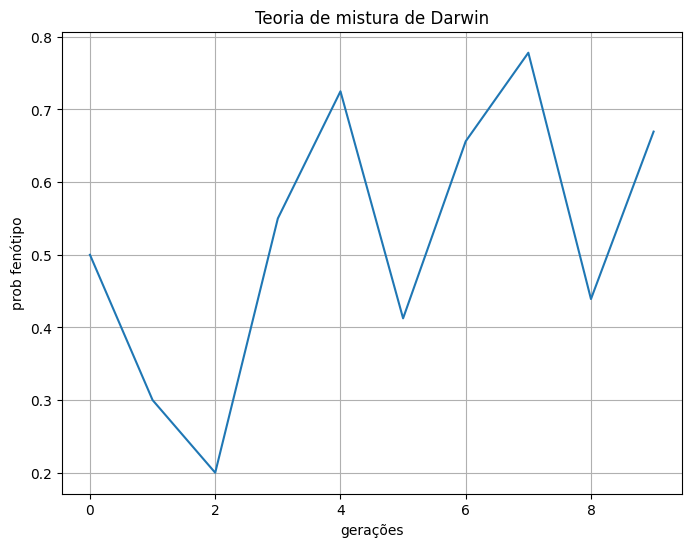

In [10]:
plt.figure(figsize=(8,6))
plt.plot(historia)
plt.xlabel('gerações')
plt.ylabel('prob fenótipo')

plt.title('Teoria de mistura de Darwin');  # este ponto e vírgula final retira o eco do matplotlib
plt.grid();

#### Qual o erro deste modelo?

  - sim estou supondo que todos os filhos "se casam" e têm filhos

#### As gerações não estão misturando 'blending' adequandamente!

  - Na geraçao seguint Pai/Mãe tem p(fenótipo) = p(fenótipo) inicial
  - Se a primeira criança é um menino: ele vai ser tornar pai (mistura de seus pais)
  - Mas, a 'menina' com ele se case também vem de uma mistura! Este é o erro

### A Distribuição Normal (ou Gaussiana)

Estudaremos mais a fundo na aula de Distribuições

#### Ela é muito importante ... aqui vai pequenos conceitos

  - Amostras de valores centrais geram uma normal
    - Temperatura de teu corpo
    - Altura dos alunos de uma classe da escola (só meninos)
    - Peso de camundongos adultos no biotério
  - A Distribuição Normal:
    - é simétrica
    - em forma de sino
    - a media é seu valor central
    - a 'largura' é medida em desvio padrões

https://en.wikipedia.org/wiki/Normal_distribution

#### Simulando uma distribuição Normal

In [11]:
N=200

mu=0.5
sigma=.3

seq_x = np.linspace(mu - 4*sigma, mu + 4*sigma, N)
# seq_x

In [12]:
A = 1 / (sigma * np.sqrt(2 * np.pi))

# formula da Normal, veja wikipedia
seq_y = A * np.exp(- (seq_x - mu)**2 / (2*sigma**2) )
# seq_y

#### Desenhando a distribuição normal

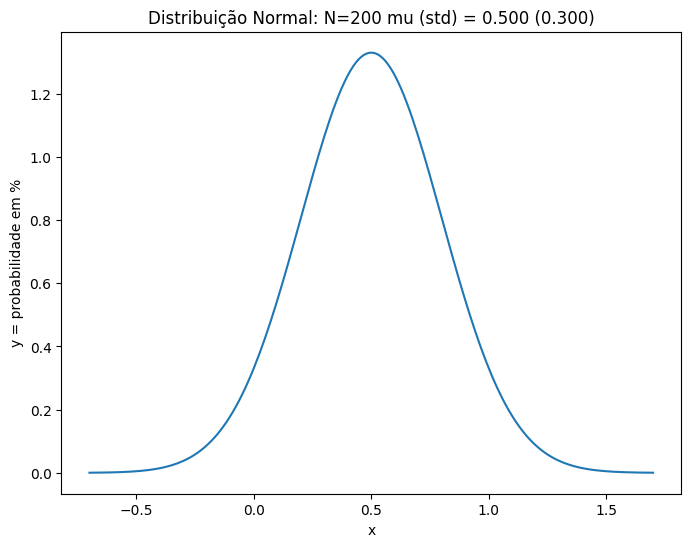

In [13]:
plt.figure(figsize=(8,6))
plt.plot(seq_x, seq_y)
plt.xlabel('x')
plt.ylabel('y = probabilidade em %')
plt.title(f'Distribuição Normal: N={len(seq_x)} mu (std) = {mu:.3f} ({sigma:.3f})');

#### Amostrando valores da distriuição normal

  - Para simulações "como na natureza" podemos amostrar valores aleatoriamente usando numpy.random ou np.random

In [14]:
mu=0.5
sigma=.3

# amostrando (sampling) de uma distribuição normal
norm_list = np.random.normal(mu, sigma, 20)
norm_list

array([0.36351545, 0.49158427, 0.43266169, 0.58386555, 0.00920476,
       0.04361904, 0.35929568, 0.37907746, 0.45959214, 1.06266413,
       0.76558932, 1.20001794, 1.11990442, 0.531467  , 0.31225558,
       0.08369767, 0.69450101, 0.44672023, 0.26233311, 0.6318686 ])

### Para os fenótipos de Darwin os valores têm que ser sempre positivos

Logo usamos a função np.abs() -> transforme em valores absolutos

In [15]:
# transformo tudo em valor absoluto > 0
norm_list = np.abs(norm_list)
norm_list

array([0.36351545, 0.49158427, 0.43266169, 0.58386555, 0.00920476,
       0.04361904, 0.35929568, 0.37907746, 0.45959214, 1.06266413,
       0.76558932, 1.20001794, 1.11990442, 0.531467  , 0.31225558,
       0.08369767, 0.69450101, 0.44672023, 0.26233311, 0.6318686 ])

#### Simulando o Ruído Branco

O ruído branco são valores amostrados com media=0 e desvio padrão qualaer, normalmente um valor < 1.

In [16]:
n_gera=20
np.random.normal(0, 0.2, n_gera)

array([-0.11320409,  0.17911375, -0.24467576,  0.03354787, -0.14531328,
        0.43981592,  0.2811666 , -0.10560266,  0.04872683,  0.01345836,
       -0.08134643, -0.11252143,  0.09038235,  0.02915487,  0.2779283 ,
       -0.19627736,  0.08559254,  0.45017155,  0.30604268, -0.09754241])

#### Vamos repetir o modelo acima, mas o cônjuge é igual a seu para mais um valor de ruído branco aleatorio

In [17]:
def blending(n_gera:int=10, p_pai0:float=0.9, p_mae0:float=0.1, desvio_padrao_rb:float=0.05, verbose:bool=False) -> list:

    p_pai=p_pai0
    p_mae=p_mae0

    historia=[]
    genero = -1

    # ruído branco ~  neutro ~ distribuição centrada no Zero com algum Desvio Padrão = 0.2
    desvio_neutro = np.random.normal(0, desvio_padrao_rb, n_gera)

    # range: gerador de números
    for geracao in range(n_gera):
        p_filho = (p_pai + p_mae) / 2
        historia.append(p_filho)

        if genero == -1:
            s_genero = 'ini'
        elif genero == 0:
            s_genero = 'masc'
        else:
            s_genero = 'fem'

        if verbose: print(f"geração {geracao:3}, genero {s_genero:4} p_filho={100*p_filho:.1f}%, p_pai={100*p_pai:.1f}%, p_mae={100*p_mae:.1f}%")

        genero = np.random.randint(2)
        if genero == 0:
            p_pai = p_filho
            p_mae = p_filho + desvio_neutro[geracao]
            if p_mae < 0: p_mae = 0
        else:
            p_mae = p_filho
            p_pai = p_filho + desvio_neutro[geracao]
            if p_pai < 0: p_pai = 0

    print("------------- end -------------")

    return historia

def plot_historia(historia:list):
    mu = np.mean(historia)
    std = np.std(historia)

    plt.figure(figsize=(8,6))
    plt.plot(historia)
    plt.xlabel('prob fenótipo')
    plt.ylabel('gerações')
    plt.title(f'Teoria de mistura de Darwin: n={len(historia)} mu (std) = {mu:.3f} ({std:.3f})');

------------- end -------------


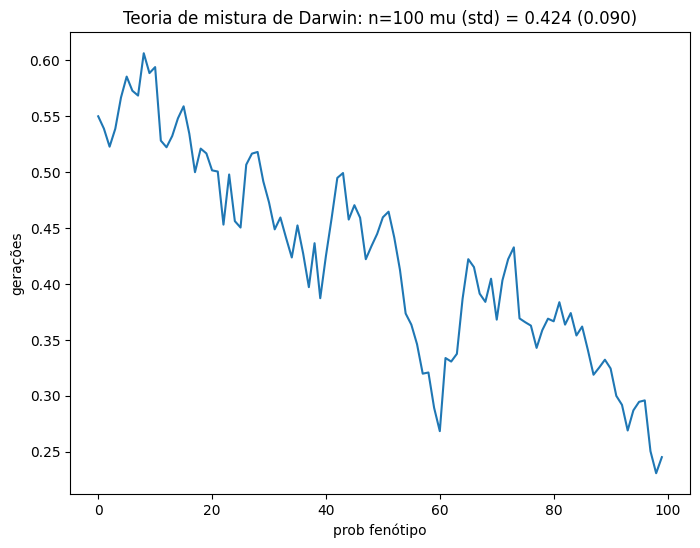

In [18]:
N=100
historia = blending(n_gera=N, p_pai0=0.9, p_mae0=0.2, verbose=False)
plot_historia(historia)

#### Pensamento de Darwin: a mistura achata o Desvio Padrão Amostral e normaliza a média para 0.5

### Isto não ocorre na natureza!

### Equilíbro de Hardy-Weinberg (EHW)

https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle

Se não houver nenhum alteração seletiva ou de alteração alélica randômica**, os alelos de um determinado locus se manterá equilibrado, ou próximo ao equilíbrio, por muitas gerações, até surgir um fenômeno como "seleção artificial" ou *`bottleneck`* (estrangulamento da população).

**Importante** - toda estatístia e valores percentuais são basedos para uma população, nunca para um ou poucos individuos (*`bottleneck`*).

\** - Deriva genética, escolha de parceiros, acasalamento seletivo, seleção natural, seleção sexual, mutação, fluxo gênico, distorção meiótica, carona genética, gargalo populacional, efeito fundador, endogamia e depressão por exogamia.

#### Equilíbro de Hardy-Weinberg (EHW) - utiliza a distribuição binomial

distribuição = p\**2 + 2pq + q\**2

https://en.wikipedia.org/wiki/Binomial_distribution

#### Variância da binomial

var = npq

In [19]:
p_pai0=0.9
p_mae0=0.1

n=1

var = 1 * p_pai0 * p_mae0
f"variância:{var:.2f}"

'variância:0.09'

##### A variança é 9% para os valores p e q acima citados
##### A variança não varia ao passar das gerações se mantido o EHW

### Alelos e Dominância

Para Mendel os fenótipos tem que seguir os conceitos de alelos e dominância

Ele só observou e anotou alelos Dominantes (F) ou Recessivos (f) devido ao modelo das ervilhas.

Logo,

  - Se cor de pele escura é dominate = F
  - E cor de pele clara é recessiva = f
  - A prole só pode ser:
    - FF - pele escura
    - Ff - pele escura
    - ff - pele clara

Para Mendel, assim como as ervilhas eram sempre Verdes ou Amarelas, ele esperaria somente Pele Escura ou Pele Clara (fato que está errado!)

  - Mendel não conhecia codominância
  - Determinados fenótipos podem depender de vários genes.
  - A cor da pele depende:
    - Tipo de melanina
      - Eumelanina: pigmentos negros
      - Fenomelanina: pigmentos vermelhos-amarelados
      - Pode não expressar melanina: albinismo
    - Tamanho da célula que produz melanina
    - Distribuição das células que produzem melanina
    - Pode ter alterações devido ao meio ambiente - radiação UV

Mendel deu sorte ao escolher as ervilhas como seu modelo biológico, cujo fenótipo é muito menos complexo que vários fenótipos humanos.